# Test Gaussian anamorphosis with normal distribution

TODO: reporduce this in RGeostat to check for errors

A fluctuation in pygslib.nonlinear.Y2Z vs raw input is observed. This may be related to inconsistencies of the PCI. 

In [1]:
import pygslib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# create a dataset with known underlying gaussian distribution
gaussian_mean = 20
gaussian_sigma= 18

#generate a glognormal sample
normal_db = np.random.normal(gaussian_mean, gaussian_sigma, size=1000)
normal_cdf = np.sort(normal_db) # the cdf


#actual moments (see https://en.wikipedia.org/wiki/Log-normal_distribution)
actual_mean = gaussian_mean
actual_var = gaussian_sigma

In [3]:
# calculate bootstrap stats and compare with actual stats
bst_mean = []
bst_var = []
sample_size = 1000
iterations = 1000
replacement = True
for i in range(iterations):
    tmp = np.random.choice(normal_db, size=sample_size, replace=replacement)
    bst_mean.append(np.mean(tmp))
    bst_var.append(np.var(tmp))
    
print (" actual mean {:.2f}\n".format(actual_mean), 
       "experimental mean {:.2f}\n".format(np.mean(normal_db)), 
       "bootstrap mean {:.2f}".format(np.mean(bst_mean)))
print (" actual var {:.2f}\n".format(actual_var), 
       "experimental var {:.2f}\n".format(np.var(normal_db)), 
       "bootstrap var {:.2f}".format(np.mean(bst_var)))


 actual mean 20.00
 experimental mean 21.05
 bootstrap mean 21.03
 actual var 18.00
 experimental var 317.03
 bootstrap var 316.58


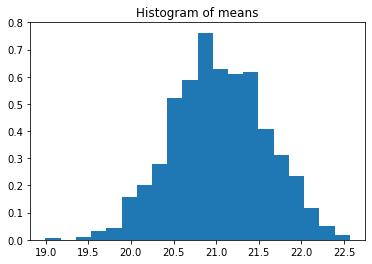

In [4]:
plt.hist(bst_mean, density = True, bins = 20);
plt.title('Histogram of means');

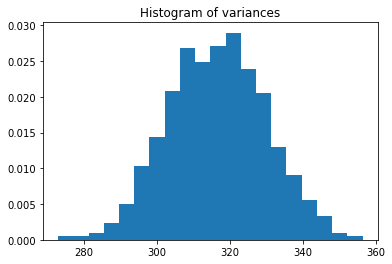

In [5]:
plt.hist(bst_var, density = True, bins = 20);
plt.title('Histogram of variances');

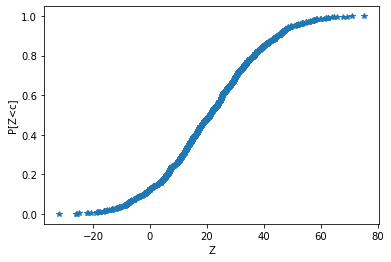

In [6]:
# plot the CDF
plt.plot(normal_cdf,np.arange(normal_cdf.shape[0])/normal_cdf.shape[0], '*');
plt.xlabel('Z')
plt.ylabel('P[Z<c]')
plt.show()

('Raw Variance', 317.03037748887107)
('Variance from PCI', 316.755042906623)
('zamin', -30.249683445382658)
('zamax', 74.18690963095064)
('yamin', -3.27735134669849)
('yamax', 3.2839389875963763)
('zpmin', -31.71482305672167)
('zpmax', 75.07406672621846)
('ypmin', -3.2839389875963763)
('ypmax', 3.2839389875963763)


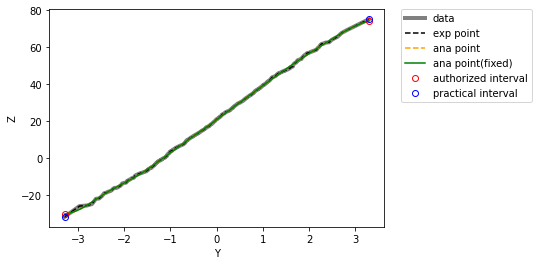

In [7]:
# get the anamorphosis
PCI, H, raw, zana, gauss, Z, P, raw_var , PCI_var, \
fig, zamin, zamax, yamin, yamax, zpmin, zpmax, ypmin, ypmax = pygslib.nonlinear.anamor(
                         z = normal_db, w = normal_db*0 + 1, ltail=1, utail=1, ltpar=1, utpar=1, K=30, 
                         zmin=None, zmax=None, ymin=None, ymax=None,
                         zamin=None, zamax=None, zpmin=None, zpmax=None,
                         ndisc = 1000)

In [8]:
# get distribution back from PCI
normal_db_baktr = pygslib.nonlinear.Y2Z(y = (normal_db-gaussian_mean)/gaussian_sigma, 
                      PCI = PCI, 
                      zamin = zamin, 
                      yamin = yamin, 
                      zpmin = zpmin, #zpmin,
                      ypmin = ypmin, 
                      zpmax = zpmax, #zpmax, 
                      ypmax = ypmax,
                      zamax = zamax, 
                      yamax = yamax,
                      r=1)

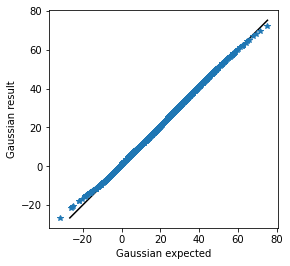

In [9]:
# plot the results
mx = max(max(normal_db), max(normal_db_baktr))
mi = max(min(normal_db), min(normal_db_baktr))

# plot normal data vs back transf in normal space
plt.plot([mi,mx], [mi,mx], '-k')
plt.plot(normal_db, normal_db_baktr, '*')
plt.xlabel('Gaussian expected')
plt.ylabel('Gaussian result')
plt.axis('scaled')
plt.show()


In [10]:
print (" zamin {:.2f}\n".format(zamin), 
      "yamin {:.2f}\n".format(yamin), 
      "zpmin {:.2f}\n".format(zpmin),
      "ypmin {:.2f}\n".format(ypmin), 
      "zpmax {:.2f}\n".format(zpmax), 
      "ypmax {:.2f}\n".format(ypmax),
      "zamax {:.2f}\n".format(zamax), 
      "yamax {:.2f}\n".format(yamax),)

 zamin -30.25
 yamin -3.28
 zpmin -31.71
 ypmin -3.28
 zpmax 75.07
 ypmax 3.28
 zamax 74.19
 yamax 3.28



# Distribution of the residuals

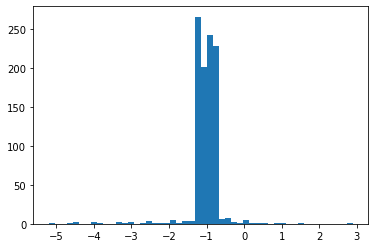

In [11]:
plt.hist(normal_db - normal_db_baktr, bins = 50); 

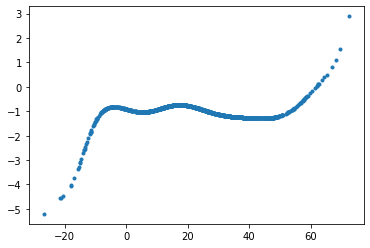

In [12]:
plt.plot(normal_db_baktr, (normal_db - normal_db_baktr), '.')